In [2]:
#OpenStack Data is divided in three parts:Normal1,Normal2, Abnormal
#Let's start analyzing the columns and the trends

#1. Normal2- 18047 rows: columns, IDs and histograms, clusters 
# Columns were merged to form Log desc and Log desc2 --> data cleaning

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data=pd.read_csv('openstack_normal2_18047.csv')
data.head()

C:\Users\manas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Log,Date,Time,ID,Type,Source,Log Desc,Log Desc2
0,nova-compute.log.1.2017-05-17_12:02:35,5/16/2017,3:15:55 PM,2931,INFO,nova.compute.manager,[req-7a738b84-d574-43c6-a6c4-68c164365101 e887...,Took 0.54 seconds to deallocate network for in...
1,nova-compute.log.1.2017-05-17_12:02:35,5/16/2017,3:15:56 PM,2931,WARNING,nova.virt.libvirt.imagecache,[req-addc1839-2ed5-4778-b57e-5854eb7b8b09 - - ...,file: /var/lib/nova/instances/_base/a489c868f0...
2,nova-compute.log.1.2017-05-17_12:02:35,5/16/2017,3:15:56 PM,2931,INFO,nova.virt.libvirt.imagecache,[req-addc1839-2ed5-4778-b57e-5854eb7b8b09 - - ...,files: /var/lib/nova/instances/_base/a489c868f...
3,nova-compute.log.1.2017-05-17_12:02:35,5/16/2017,3:15:56 PM,2931,INFO,nova.virt.libvirt.imagecache,[req-addc1839-2ed5-4778-b57e-5854eb7b8b09 - - ...,or swap file: /var/lib/nova/instances/_base/a4...
4,nova-api.log.1.2017-05-17_12:02:19,5/16/2017,3:16:02 PM,25749,INFO,nova.osapi_compute.wsgi.server,[req-378bb69b-363b-4c4f-a92c-a0e59baa5ca0 113d...,status: 200 len: 1581 time: 0.0648119


In [3]:
 
data['Type'].value_counts()


INFO        134916
WARNING       1988
ERROR          169
CRITICAL         1
Name: Type, dtype: int64

In [4]:
data['Type'].value_counts().plot('bar')

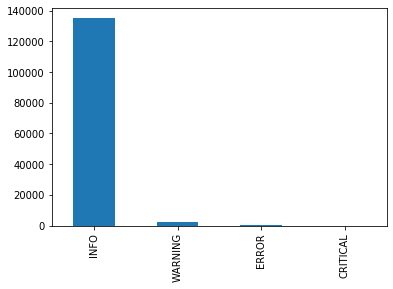

In [5]:

plt.show()

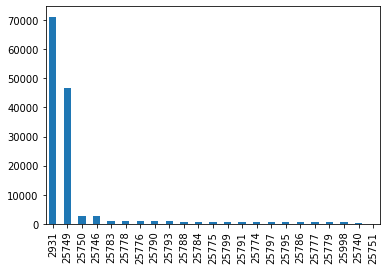

In [6]:

data['ID'].value_counts()
data['ID'].value_counts().plot('bar')
plt.show()

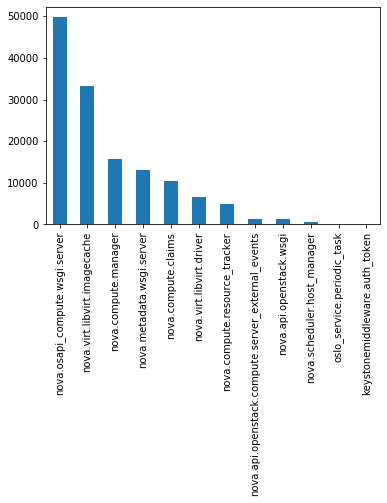

In [7]:
data['Source'].value_counts()
data['Source'].value_counts().plot('bar')
plt.show()

In [9]:
data['Date'].value_counts()

5/16/2017    71069
5/17/2017    66005
Name: Date, dtype: int64

In [41]:
#Time series analysis - Type vs day, ID vs day, Source vs day
data['Time'].value_counts()


12:15:06 AM    35
4:30:35 PM     32
5:24:15 AM     31
8:31:46 PM     31
10:16:51 PM    31
7:33:01 PM     30
5:41:21 PM     29
11:40:35 PM    22
11:53:01 PM    20
5:30:16 PM     20
4:16:45 PM     20
6:25:19 AM     19
9:18:09 PM     18
5:14:35 AM     18
2:42:00 AM     18
1:16:06 AM     18
12:13:43 AM    17
12:41:25 AM    17
2:03:57 AM     16
8:51:51 PM     16
2:11:33 AM     16
3:49:51 AM     16
4:29:29 AM     16
9:20:55 PM     16
1:26:34 AM     16
10:04:23 PM    16
5:56:46 AM     16
3:03:33 AM     16
6:38:20 PM     16
4:22:15 PM     16
               ..
3:58:31 AM      1
4:52:42 AM      1
3:24:34 AM      1
4:17:40 PM      1
3:44:57 AM      1
7:12:32 PM      1
4:32:59 AM      1
3:53:06 PM      1
12:00:31 AM     1
12:47:22 AM     1
11:38:22 PM     1
7:15:23 PM      1
9:16:38 PM      1
2:23:38 AM      1
1:08:31 AM      1
6:17:18 PM      1
6:40:21 PM      1
10:12:21 PM     1
4:54:13 AM      1
12:17:06 AM     1
8:31:38 PM      1
4:03:22 PM      1
11:41:32 PM     1
3:15:14 AM      1
3:08:44 AM

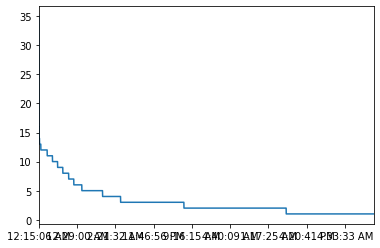

In [42]:
data['Time'].value_counts().plot()
plt.show()

C:\Users\manas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


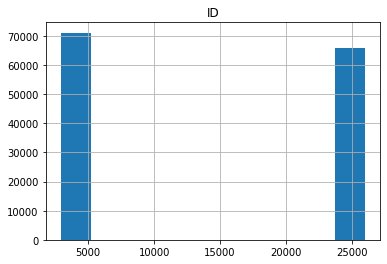

In [43]:
series = pd.read_csv('openstack_normal2_18047.csv', header=0, parse_dates=True, squeeze=True)
series.hist()
plt.show()

C:\Users\manas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


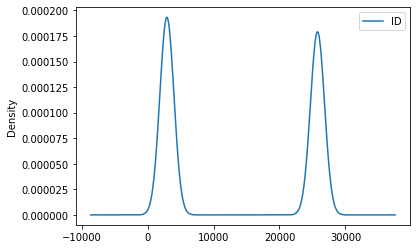

In [44]:
series = pd.read_csv('openstack_normal2_18047.csv', header=0, parse_dates=True, squeeze=True)
series.plot(kind='kde')
plt.show()

C:\Users\manas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


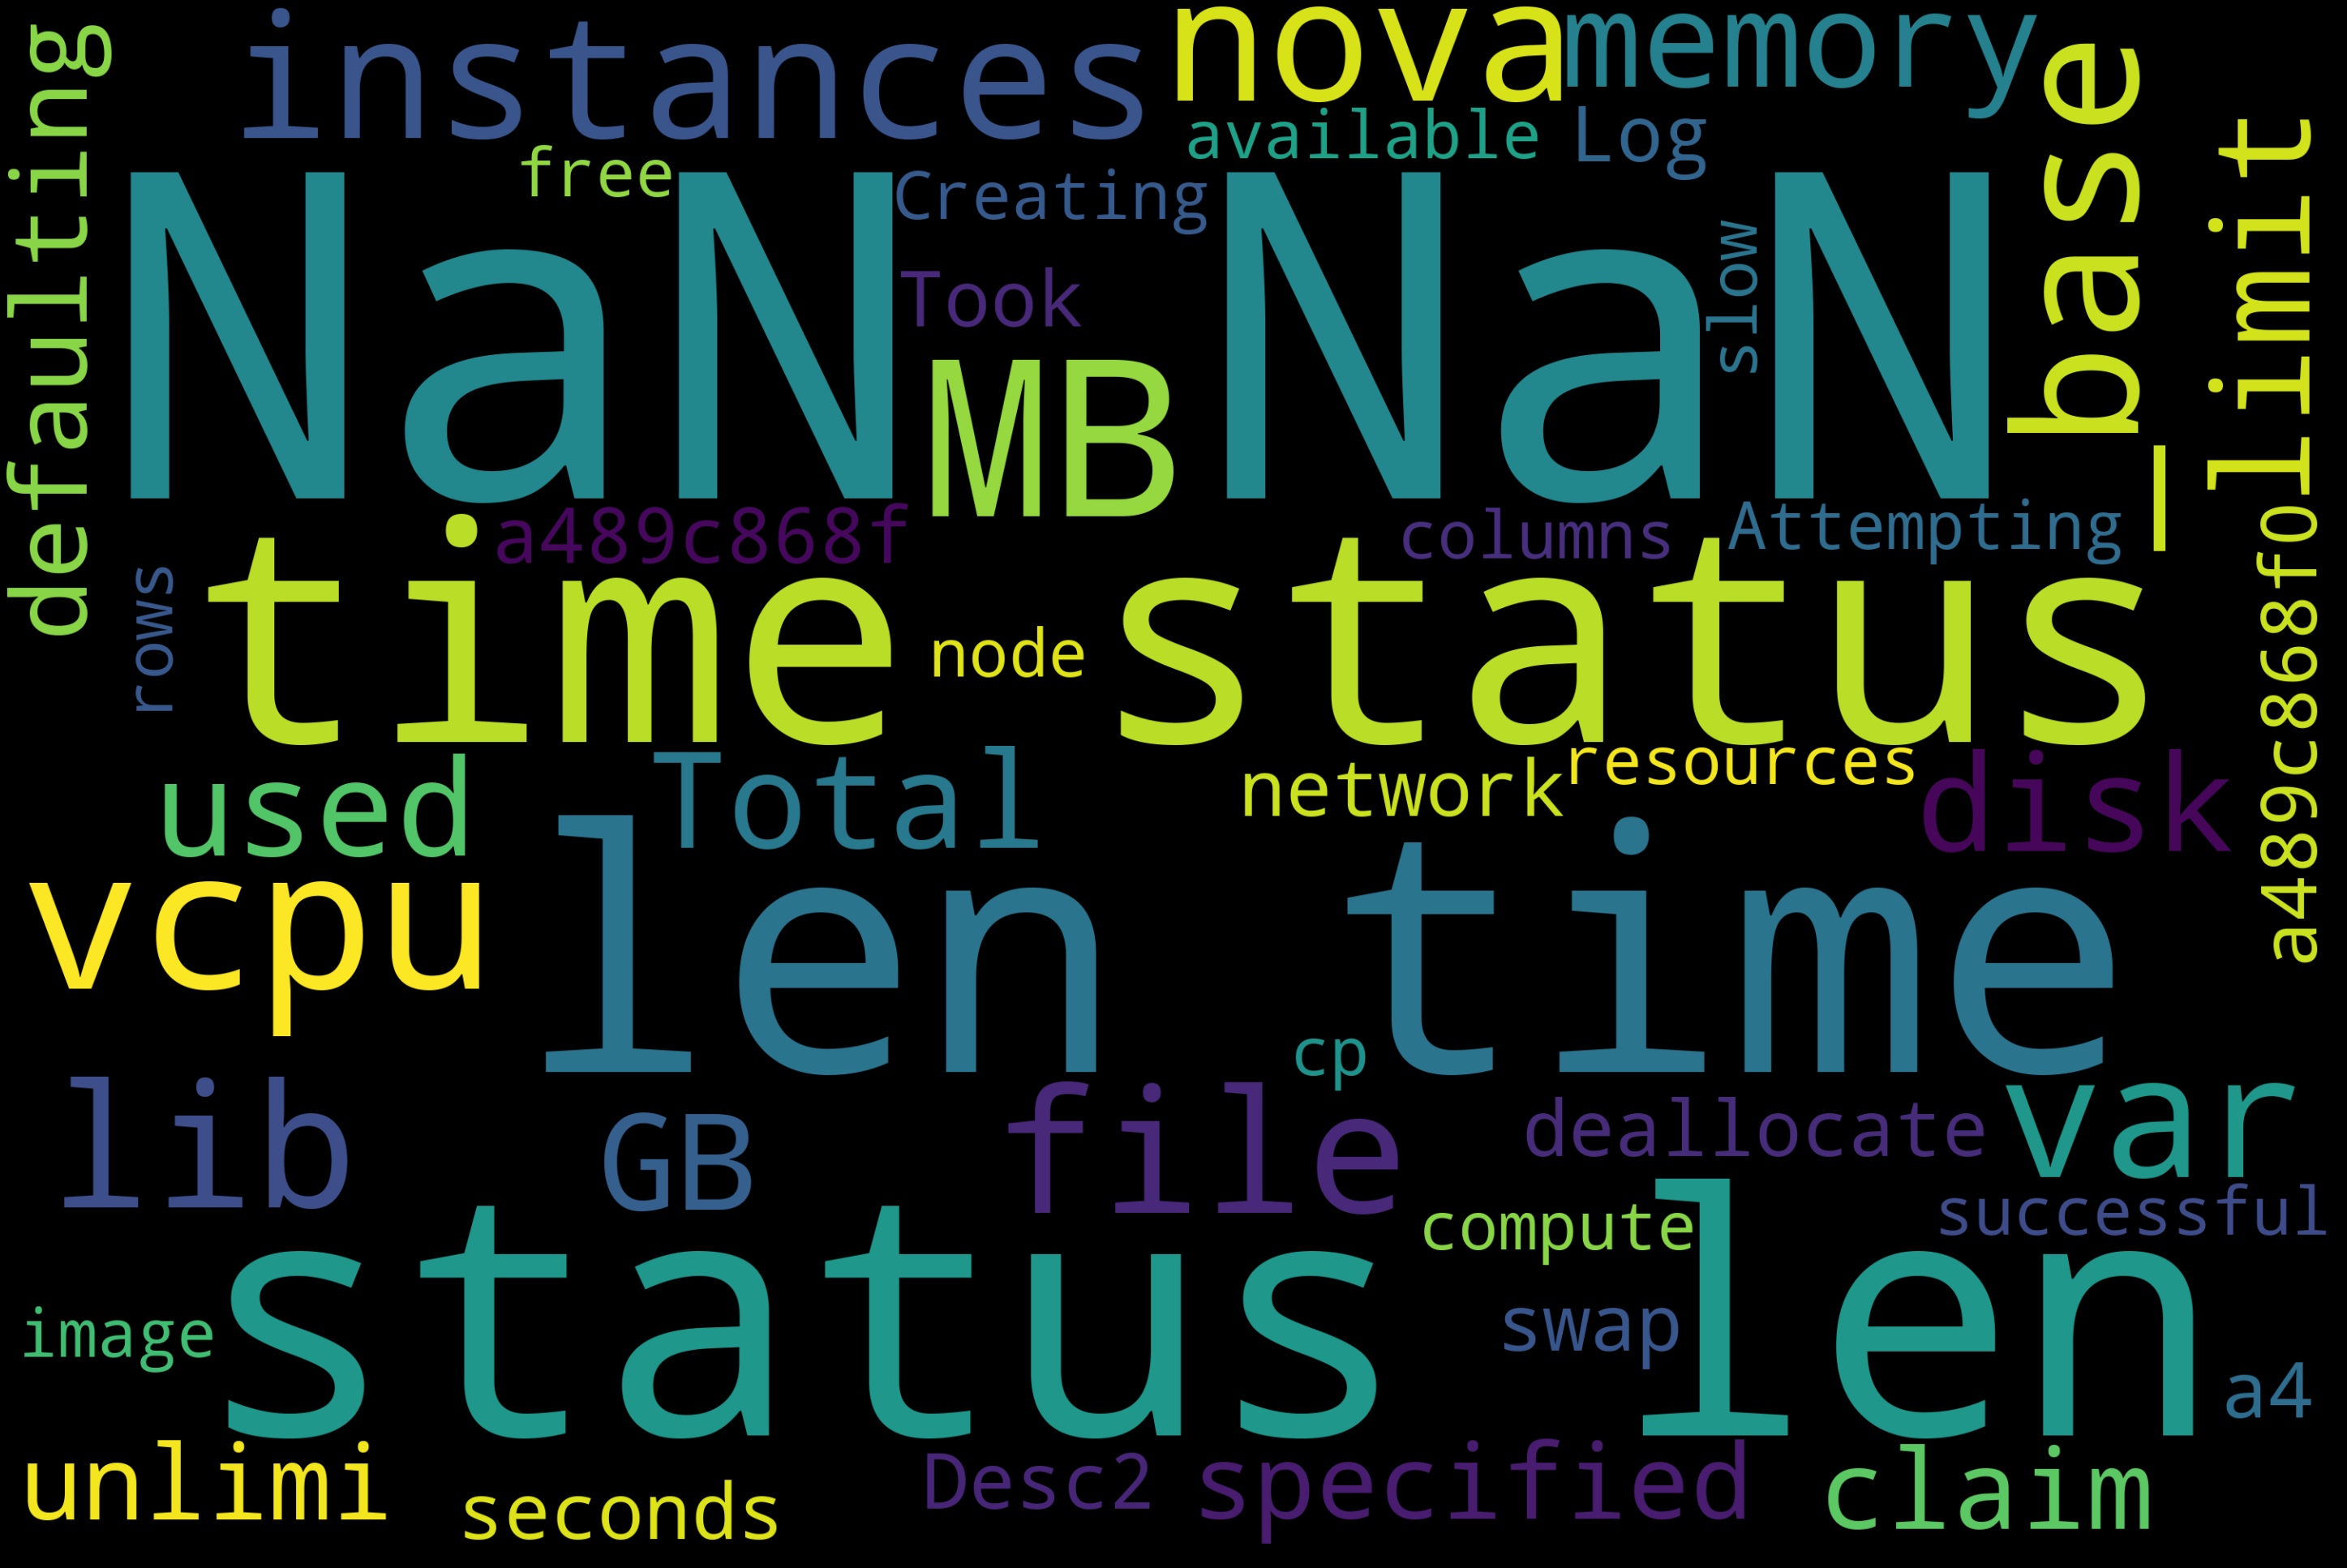

In [58]:
#Word cloud for Log desc2
data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

fields=['Log Desc2']
text2 = pd.read_csv('openstack_normal2_18047.csv', usecols=fields)
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text2))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
#TF IDF for Log desc, Log desc2